In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('IMDbMovies.csv')

In [7]:
df.head()

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Runtime,Release Year,Rating,Number of Ratings,Budget,Gross in US & Canada,Gross worldwide,Opening Weekend Gross in US & Canada
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2h 38m,2023.0,6.7/10,38K,NaN,"$37,514,498","$84,968,381","$20,638,887Nov 26, 2023"
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2h 37m,2023.0,7.2/10,37K,"$100,000,000 (estimated)","$105,043,414","$191,729,235","$44,607,143Nov 19, 2023"
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,1h 58m,2023.0,6.8/10,117K,NaN,NaN,"$421,332",NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,1h 42m,2023.0,7.0/10,10K,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,1h 46m,2023.0,7.0/10,9.1K,NaN,"$25,408,677","$29,666,585","$10,306,272Nov 19, 2023"


### Пропущенные значения

In [8]:
missing_values = df.isnull().sum()

In [9]:
print("Количество пропущенных значений в каждой категории\n")
print(missing_values)

Количество пропущенных значений в каждой категории

Title                                      0
Summary                                    0
Director                                  31
Writer                                   324
Main Genres                                7
Motion Picture Rating                    798
Runtime                                  165
Release Year                               7
Rating                                   270
Number of Ratings                        270
Budget                                  3204
Gross in US & Canada                    3019
Gross worldwide                         1955
Opening Weekend Gross in US & Canada    3388
dtype: int64


##### В данном датасете есть большое количество пропущенных значений. Было принято решение оставить данные значения как есть. Дальнейший анализ был проведен с использованием столбцов, в которых содержится минимальное количество пропусков.

### Уникальные значения

In [10]:
unique_values_categorical = df.select_dtypes(include='object').nunique()

In [11]:
print("Количество уникальных значений в каждой категории\n")
print(unique_values_categorical)

Количество уникальных значений в каждой категории

Title                                   8728
Summary                                 9051
Director                                4363
Writer                                  7853
Main Genres                              460
Motion Picture Rating                     25
Runtime                                  171
Rating                                    82
Number of Ratings                       1149
Budget                                   903
Gross in US & Canada                    6041
Gross worldwide                         7117
Opening Weekend Gross in US & Canada    5684
dtype: int64


In [12]:
numeric_columns = df.select_dtypes(include='number')

Распределение фильмов по годам выпуска


Text(0, 0.5, 'Количество фильмов')

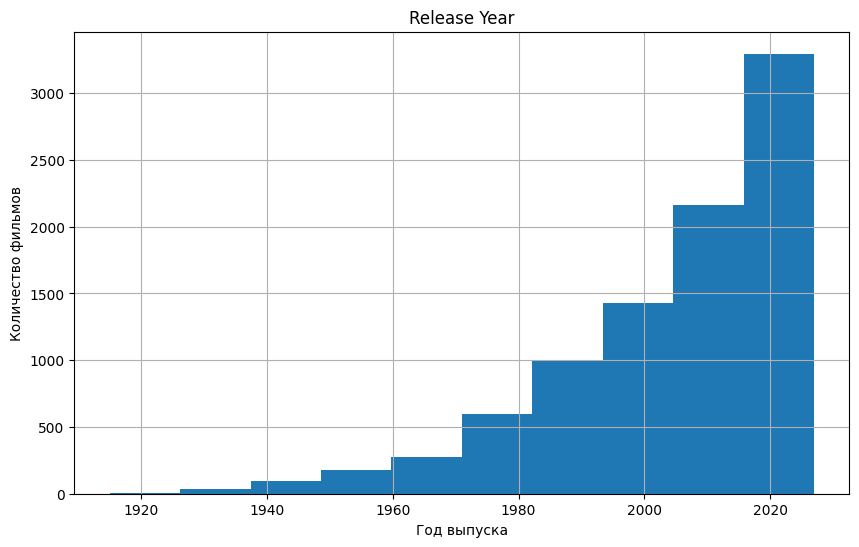

In [14]:
print("Распределение фильмов по годам выпуска")
h = numeric_columns.hist(figsize=(10, 6))
plt.xlabel("Год выпуска")
plt.ylabel("Количество фильмов")

##### Был проведен анализ уникальных значений. Категории "Title" и "Summary" имеют наибольшее количество уникальных значений, соответственно 8728 и 9051. Это указывает на разнообразие фильмов в наборе данных и наличие различных описаний для каждого фильма. Категория "Motion Picture Rating" имеет всего 25 уникальных значений. Это указывает на использование ограниченного числа рейтинговых систем для классификации фильмов. 
##### Была построена гистограмма для числовых данных, и на основе этой гистограммы можно сделать вывод, что количество фильмов с каждым годом растет экспоненциально.

### Селекты

In [15]:
df_select_1 = df[df['Release Year'] == 2023]

In [16]:
print("Фильмы, выпущенные в 2023 году\n")
print(df_select_1.loc[:, ["Title", "Release Year"]])

Фильмы, выпущенные в 2023 году

                                                  Title  Release Year
0                                              Napoleon        2023.0
1     The Hunger Games: The Ballad of Songbirds & Sn...        2023.0
2                                            The Killer        2023.0
3                                                   Leo        2023.0
4                                          Thanksgiving        2023.0
...                                                 ...           ...
9027                                 Silver Dollar Road        2023.0
9033                                        Due Justice        2023.0
9038                                          The Abyss        2023.0
9041                                             Falimy        2023.0
9075                                              Sleep        2023.0

[879 rows x 2 columns]


##### В 2023 году было выпущено 879 фильмов.

In [17]:
df_select_2 = df[df['Motion Picture Rating'] == 'PG-13']

In [18]:
print("Фильмы, чей возрастной рейтинг равен PG-13\n")
print(df_select_2.loc[:, ["Title", "Motion Picture Rating"]])

Фильмы, чей возрастной рейтинг равен PG-13

                                                  Title Motion Picture Rating
1     The Hunger Games: The Ballad of Songbirds & Sn...                 PG-13
7                                           The Marvels                 PG-13
9                                           The Creator                 PG-13
12                              Five Nights at Freddy's                 PG-13
13                                          Blue Beetle                 PG-13
...                                                 ...                   ...
9049                                    Please Stand By                 PG-13
9056                                             Gambit                 PG-13
9066                                   Don Juan DeMarco                 PG-13
9074                                         Jessabelle                 PG-13
9076                                         The Marine                 PG-13

[1942 rows x 2 colu

##### За период с 1915 г. по 2023 г. было выпущено 1942 фильма с рейтингом PG-13

In [39]:
selected_genres = ['Comedy']
df_select_3 = df[df['Main Genres'].isin(selected_genres)]

In [41]:
print("Фильмы - комедии\n")
print(df_select_3.loc[:, ["Title", "Main Genres"]])

Фильмы - комедии

                                                  Title Main Genres
21    Please Don't Destroy: The Treasure of Foggy Mo...      Comedy
29                National Lampoon's Christmas Vacation      Comedy
49                                             Old Dads      Comedy
52                                                EXmas      Comedy
99                                        All-Time High      Comedy
...                                                 ...         ...
8965              The Discreet Charm of the Bourgeoisie      Comedy
8982                                       Action Point      Comedy
8988                                The Slammin' Salmon      Comedy
9046                                 Carry on Constable      Comedy
9068                                            Rossini      Comedy

[271 rows x 2 columns]


##### За период с 1915 г. по 2023 г. была выпущена 271 комедия

In [42]:
df_select_4 = df[df['Director'] == 'David Fincher']

In [43]:
print("Таблица фильмов, режиссером которых является Дэвид Финчер\n")
print(df_select_4.loc[:, ["Title", "Director"]])

Таблица фильмов, режиссером которых является Дэвид Финчер

                                    Title       Director
2                              The Killer  David Fincher
283                                Alien³  David Fincher
726                            Fight Club  David Fincher
1181                           Panic Room  David Fincher
1257                                Se7en  David Fincher
1266                            Gone Girl  David Fincher
2356                   The Social Network  David Fincher
3459      The Girl with the Dragon Tattoo  David Fincher
3988                               Zodiac  David Fincher
6687                                 Mank  David Fincher
6691                             The Game  David Fincher
7256  The Curious Case of Benjamin Button  David Fincher


##### Дэвид Финчер является режиссером 12 фильмов.

In [19]:
df_select_5 = df[(df['Release Year'] == 2000) & (df['Motion Picture Rating'] == 'R')]

In [21]:
print("Таблица фильмов, выпущенных в 2000 году с возрастным рейтингом R\n")
print(df_select_5.loc[:, ["Title", "Release Year", "Motion Picture Rating"]])
print(df_select_5.loc[:, ["Title", "Release Year", "Motion Picture Rating"]].count())

Таблица фильмов, выпущенных в 2000 году с возрастным рейтингом R

                            Title  Release Year Motion Picture Rating
82                      Gladiator        2000.0                     R
271                   The Patriot        2000.0                     R
277          The Whole Nine Yards        2000.0                     R
563                      The Gift        2000.0                     R
758             Final Destination        2000.0                     R
794                      Scream 3        2000.0                     R
953                    Hollow Man        2000.0                     R
1064                    Road Trip        2000.0                     R
1074                    The Beach        2000.0                     R
1316              Erin Brockovich        2000.0                     R
1413                      Traffic        2000.0                     R
1482           Me, Myself & Irene        2000.0                     R
1619                    

##### В 2000 году было выпущено 50 фильмов с рейтингом R.

### Агрегирующие запросы

In [50]:
min_release_year = df['Release Year'].min()

In [62]:
print("Самый ранний год, когда был выпущен фильм:")
print(min_release_year)

Самый ранний год, когда был выпущен фильм:
1915.0


In [52]:
max_release_year = df['Release Year'].max()

In [63]:
print("Год выпуска самого позднего фильма")
print(max_release_year)

Год выпуска самого позднего фильма
2027.0


In [54]:
summary_by_director = df.groupby('Director').agg({'Title': 'count'})

In [65]:
print("Количество фильмов, снятых определенным режиссером\n")
print(summary_by_director)

Количество фильмов, снятых определенным режиссером

                               Title
Director                            
A. Edward Sutherland               1
A.J. Edwards                       1
A.K. Sajan                         1
A.V. Rockwell                      1
Aanand L. Rai                      1
...                              ...
Élie Chouraqui                     2
Éric Besnard                       1
Éric Toledano,Olivier Nakache      2
Éric Warin,Eric Summer             1
Óskar Thór Axelsson                1

[4363 rows x 1 columns]


In [56]:
summary_by_rating = df.groupby('Motion Picture Rating').agg({'Title': 'count'})

In [68]:
print("Распределение фильмов по возрастным рейтингам\n")
print(summary_by_rating)

Распределение фильмов по возрастным рейтингам

                       Title
Motion Picture Rating       
13+                        7
16+                        7
18+                        5
Approved                 150
G                        213
GP                        17
M                          5
M/PG                       3
MA-17                      1
NC-17                     25
Not Rated                599
PG                      1148
PG-13                   1942
Passed                   109
R                       3508
T                          1
TV-14                     87
TV-G                      17
TV-MA                    242
TV-PG                     49
TV-Y                       1
TV-Y7                      2
TV-Y7-FV                   1
Unrated                  124
X                         22
